# Prosta regresja z PyTorch od guru99
14:20
https://www.guru99.com/pytorch-tutorial.html

### Krok 1) Tworzenie naszego modelu sieci

Nasz model sieci to prosta warstwa liniowa o kształcie wejściowym i wyjściowym równym 1.

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer = torch.nn.Linear(1, 1)

    def forward(self, x):
        x = self.layer(x)      
        return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


### Krok 2) Tworze dane

In [2]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

Przed rozpoczęciem procesu szkolenia musisz przekonwertować tablicę numpy na zmienne obsługiwane przez Torch i autograd

In [3]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()
print(x, y)

tensor([0.3794, 0.9252, 0.9791, 0.1772, 0.4800, 0.3095, 0.9941, 0.6630, 0.3804,
        0.7205, 0.1775, 0.9957, 0.5905, 0.1158, 0.0612, 0.5056, 0.7341, 0.4886,
        0.2185, 0.1612, 0.2313, 0.8549, 0.6571, 0.8289, 0.3087, 0.8376, 0.0746,
        0.3213, 0.3120, 0.4582, 0.9505, 0.2674, 0.1690, 0.9144, 0.4211, 0.7313,
        0.1877, 0.7145, 0.1812, 0.2012, 0.9931, 0.3859, 0.5678, 0.1204, 0.3187,
        0.3711, 0.6665, 0.2644, 0.4669, 0.5726, 0.5691, 0.3884, 0.1308, 0.6817,
        0.5100, 0.8701, 0.6777, 0.5406, 0.3376, 0.8538, 0.2800, 0.5233, 0.4510,
        0.0990, 0.2330, 0.7781, 0.2047, 0.7098, 0.6875, 0.1207, 0.6167, 0.6383,
        0.6692, 0.6006, 0.3795, 0.6136, 0.3071, 0.9779, 0.3573, 0.3239, 0.2968,
        0.3845, 0.1239, 0.1334, 0.7712, 0.2849, 0.7660, 0.4786, 0.4020, 0.1558,
        0.3684, 0.0485, 0.1795, 0.4475, 0.6916, 0.2026, 0.1027, 0.6137, 0.5004,
        0.3139]) tensor([1.7581, 3.5824, 4.0080, 1.2482, 1.6788, 1.5798, 4.2673, 2.8543, 1.6909,
        2.6791, 0.7923,

Przetransformowanie x i y do postaci wektorów.

In [4]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x

tensor([[0.3794],
        [0.9252],
        [0.9791],
        [0.1772],
        [0.4800],
        [0.3095],
        [0.9941],
        [0.6630],
        [0.3804],
        [0.7205],
        [0.1775],
        [0.9957],
        [0.5905],
        [0.1158],
        [0.0612],
        [0.5056],
        [0.7341],
        [0.4886],
        [0.2185],
        [0.1612],
        [0.2313],
        [0.8549],
        [0.6571],
        [0.8289],
        [0.3087],
        [0.8376],
        [0.0746],
        [0.3213],
        [0.3120],
        [0.4582],
        [0.9505],
        [0.2674],
        [0.1690],
        [0.9144],
        [0.4211],
        [0.7313],
        [0.1877],
        [0.7145],
        [0.1812],
        [0.2012],
        [0.9931],
        [0.3859],
        [0.5678],
        [0.1204],
        [0.3187],
        [0.3711],
        [0.6665],
        [0.2644],
        [0.4669],
        [0.5726],
        [0.5691],
        [0.3884],
        [0.1308],
        [0.6817],
        [0.5100],
        [0

### Krok 3) Optymalizator i strata

In [5]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

### Step 4) Training
Teraz zacznijmy nasz proces szkolenia. W epoce 250 powtórzysz nasze dane, aby znaleźć najlepszą wartość dla naszych hiperparametrów.

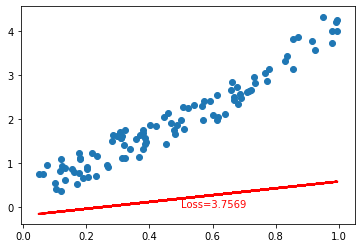

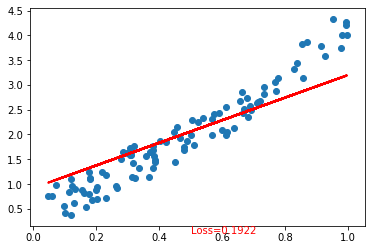

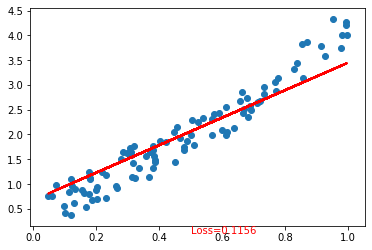

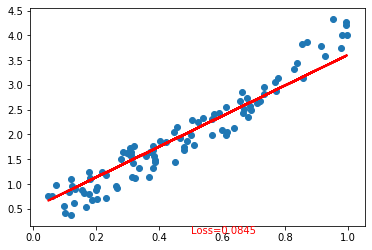

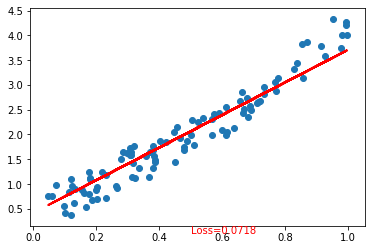

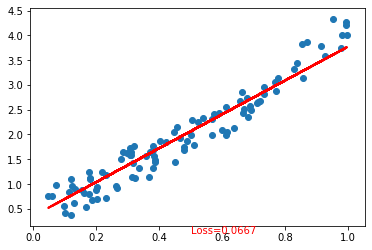

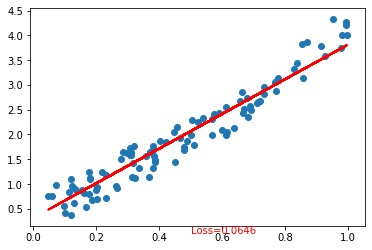

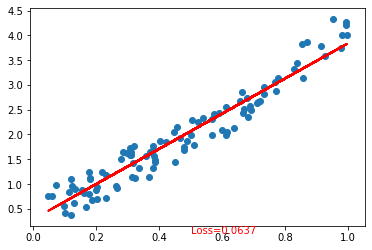

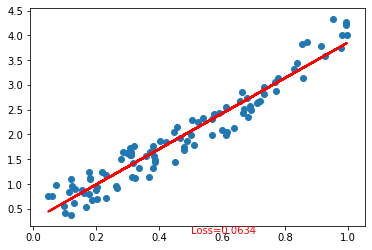

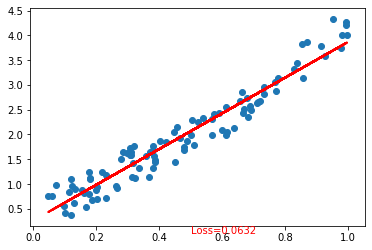

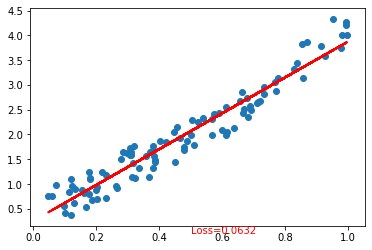

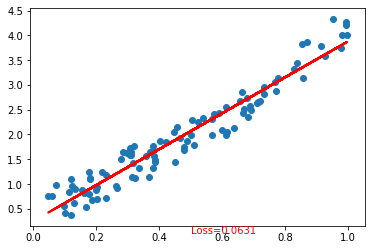

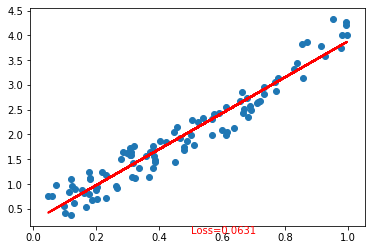

In [6]:
inputs = Variable(x)
outputs = Variable(y)
for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 20 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

### Step 5) Result